In [2]:
#import libraries

# pandas for data manipulation and analysis
import pandas as pd

# numpy for numerical operations and array handling
import numpy as np

# matplotlib for creating plots and visualizations
import matplotlib.pyplot as plt

# seaborn for advanced data visualization
import seaborn as sns

# train_test_split for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# mean_squared_error and r2_score for evaluating model performance
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('train.csv')

# Display the first few rows of the dataset to understand its structure and content
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
# Extract relevant features
features = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]

# Combine feature data and target for consistent cleaning
combined_data = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']]

# Check and drop missing values in the selected columns
missing_values = combined_data.isnull().sum()

if missing_values.any():
    print("\nWarning: Missing values detected. Corresponding rows will be removed.")
    combined_data = combined_data.dropna()

# Separate features and target after cleaning
features = combined_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
target = combined_data['SalePrice']

In [6]:
# Split the dataset into training (80%) and testing (20%) sets, ensuring reproducibility with random_state=42.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [7]:
# Initialize a Linear Regression model.
model=LinearRegression()

# Train the model using the training features (X_train) and target values (y_train).
model.fit(X_train,y_train)

LinearRegression()

In [8]:
# Make predictions on the test set (X_test) using the trained model.
predictions=model.predict(X_test)

In [10]:
# Make predictions on the test set using the trained model.
y_pred = model.predict(X_test)

# Evaluate the model by calculating the Mean Squared Error (MSE) between the actual and predicted values.
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE) by taking the square root of MSE.
rmse = np.sqrt(mse)

# Calculate the R-squared value to measure the proportion of variance explained by the model.
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics: MSE, RMSE, and R-squared.
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2806426667.247853
Root Mean Squared Error: 52975.71771338122
R-squared: 0.6341189942328371


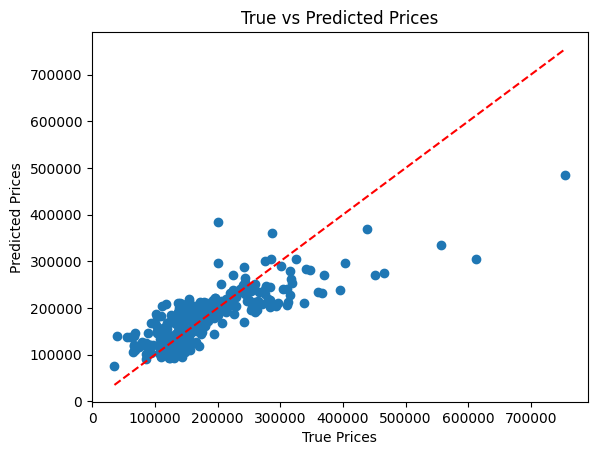

In [11]:
# Plot true vs predicted prices
plt.scatter(y_test, y_pred)
# Line representing perfect predictions
plt.xlabel('True Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')
plt.show()


In [12]:
# Create a DataFrame with the feature names and their corresponding model coefficients
coefficients=pd.DataFrame({
    'Feature':X_train.columns,    # The feature names (column names of the training dataset)
    'Coefficient':model.coef_     # The model coefficients (learned values for each feature)
})

# Print the DataFrame to show the features and their corresponding coefficients
print(coefficients)

        Feature   Coefficient
0     GrLivArea    104.026307
1  BedroomAbvGr -26655.165357
2      FullBath  30014.324109


In [13]:
# Display the intercept (y-intercept) of the model
print(f"\nOrdonnee a l'origine (intercept) : {model.intercept_}")


Ordonnee a l'origine (intercept) : 52261.74862694461
